**TASK 1**

### About Dataset

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. 

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### Content

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### Target

Need to perform clustering to summarize customer segments.

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading and making a copy of the dataset

main_df = pd.read_csv("marketing_campaign.csv", sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### EDA

In [4]:
# Checking the shape of the dataset

df.shape

(2240, 29)

In [5]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Here we have only 3 object type datatype and rest are numerical.

In [6]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**NOTE** 
* In the above cell "Z_CostContact" and "Z_Revenue" have the same value in all the rows thus they are not going to contribute anything in the model building. So we can drop them.  

In [7]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Income column has some missing values in it so we can fill it by mean.

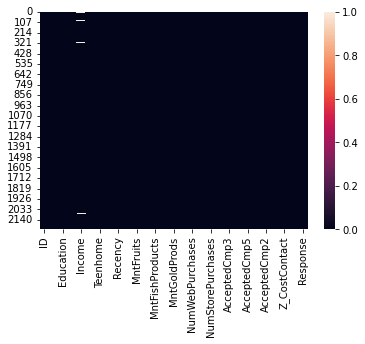

In [8]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [9]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


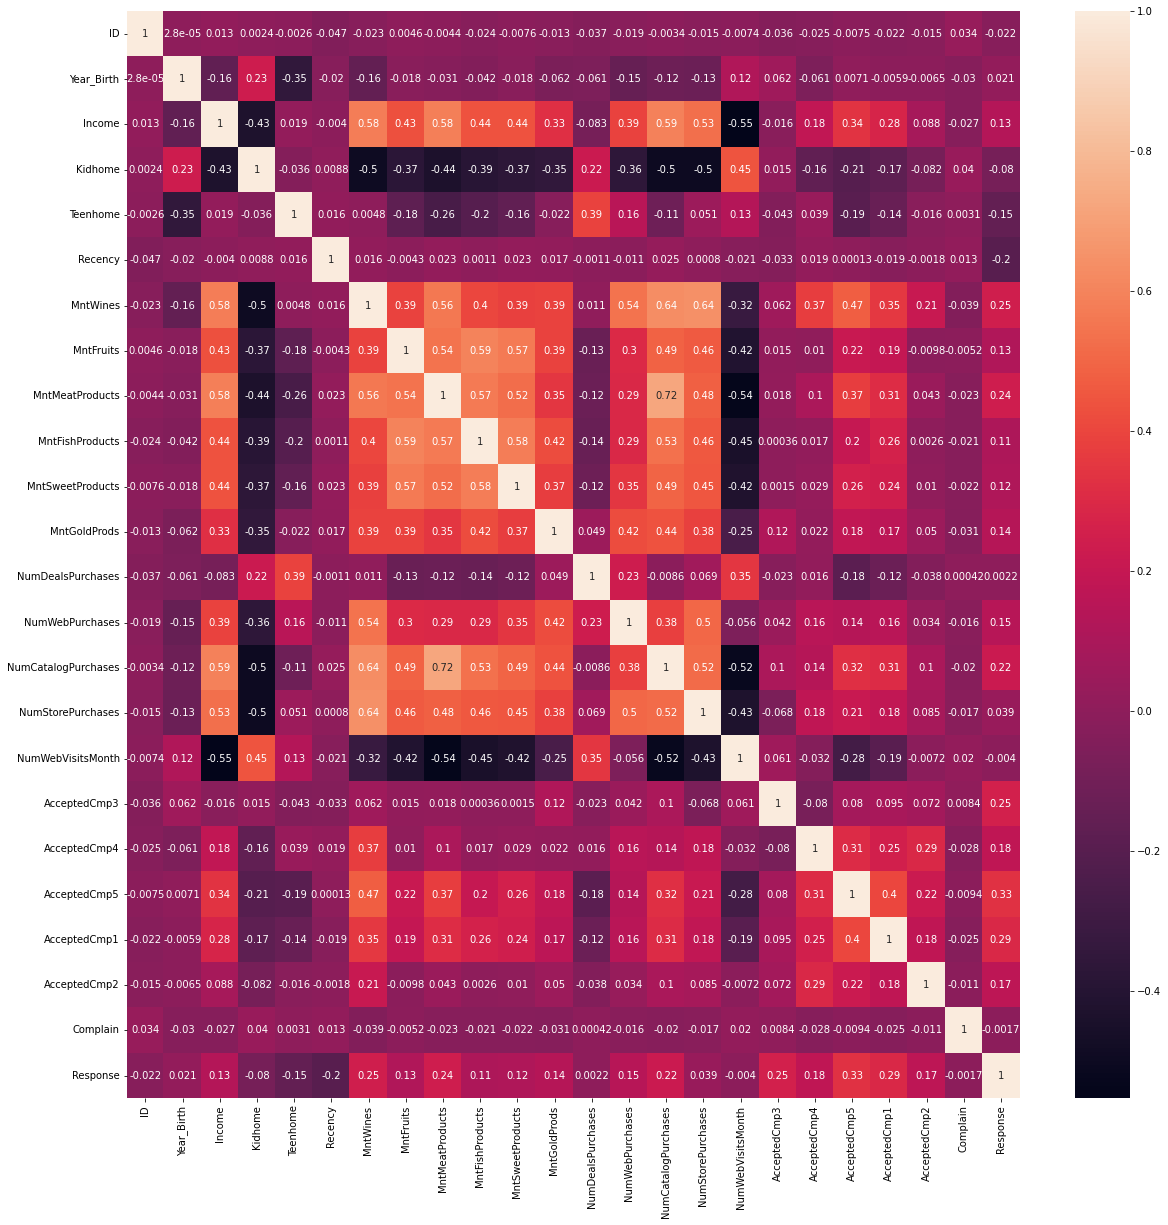

In [10]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

* No two columns are much correlated with each other so we cannot drop any column on the basis of correlation.

In [11]:
# Checking for correlation by unstacking data

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumCatalogPurchases    0.635226
MntFishProducts      MntFruits              0.594804
NumCatalogPurchases  Income                 0.589162
MntMeatProducts      Income                 0.584633
MntSweetProducts     MntFishProducts        0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntWines             MntMeatProducts        0.562667
Income               NumWebVisitsMonth      0.553088
MntFruits            MntMeatProducts        0.543105
dtype: float64

* It is used to calculate how one variable is correlated/ dependent on other variable.
* Extreme values signify high correlation.
* Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

### Preprocessing of the dataset

In [12]:
# Filling the missing values in the income column my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [14]:
# Checking number of unique categories present in the "Marital_Status" column

df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In the above cell we are grouping 'Married', 'Together' as 'relationship' whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as 'Single'

In [16]:
# Count of different values present in Marital_Status

df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [17]:
# Combining different dataframe into a single column to reduce the number of dimensions

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [18]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [19]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [20]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [21]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [22]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [23]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

### Visualization

In [24]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

In [25]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

**This shows there are less number of single customers**

In [26]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show()

In [27]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show()

In [28]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show()

In [29]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show()

In [30]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show()

In [31]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show()

**The above shows 35% of the customers are single whereas more 64% are in relationship.**

In [32]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show()

**More than 97% customers have completed PG and about 2% have done UG.**

Text(0.5, 1.0, 'Total Expense based on the Education Level')

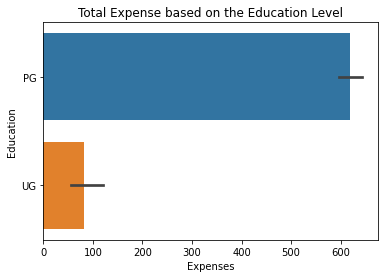

In [34]:
sns.barplot(x = df['Expenses'],y = df['Education'])
plt.title('Total Expense based on the Education Level')

Text(0.5, 1.0, 'Total Income based on the Education Level')

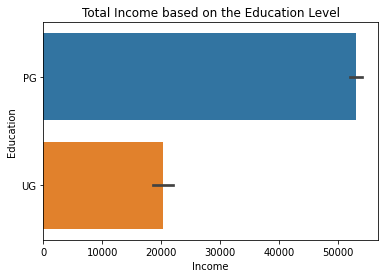

In [35]:
sns.barplot(x = df['Income'],y = df['Education'])
plt.title('Total Income based on the Education Level')

In [36]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,538.043304
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,232.229893
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,26.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,539.000000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,711.250000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,1089.000000


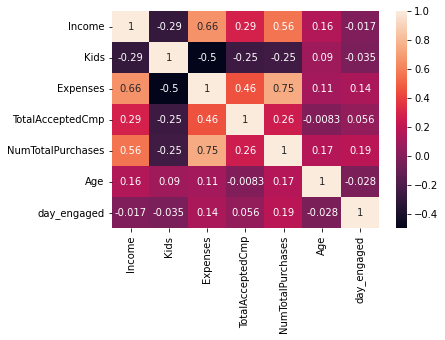

In [37]:
sns.heatmap(df.corr(), annot=True)

In [38]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [39]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [41]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [42]:
df1 = df.copy()

### Standardization 

In [43]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [44]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


### Elbow Method 

In [45]:
from sklearn.cluster import KMeans

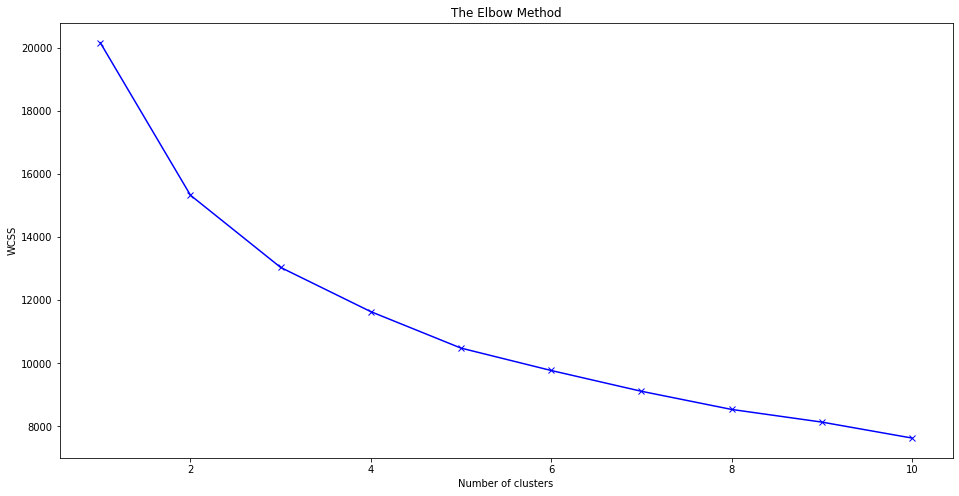

In [46]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Thus using elbow method selection of k cannot be done clearly.**

### Silhouette Score

In [47]:
from sklearn.metrics import silhouette_score 

**Using Silhouette score to measure the value of K**

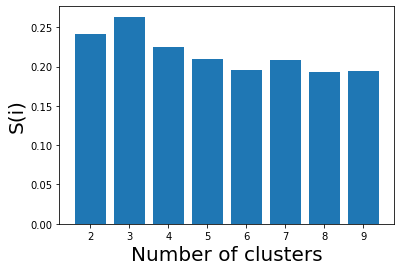

In [48]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [49]:
silhouette_scores

[0.24145101432627075,
 0.2633691981378332,
 0.22547869857815794,
 0.20978761291738096,
 0.1961315623922937,
 0.2084329272267332,
 0.19348158284914077,
 0.19424380032403674]

In [50]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


### Model Building

In [51]:
# Training and predicting using K-Means Algorithm

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

In [52]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,997,2
1,0,0,46344.0,2,27,0,6,61,151,1
2,0,1,71613.0,0,776,0,21,50,498,2
3,0,1,26646.0,1,53,0,8,31,91,1
4,0,1,58293.0,1,422,0,19,34,347,1


In [53]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


In [54]:
df['Education'].value_counts()

0    2186
1      54
Name: Education, dtype: int64

* 0 means PG and 1 means UG
* There are very less customers from UG background

### Clustering 

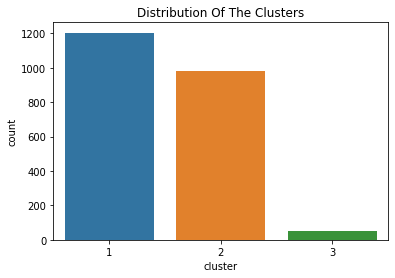

In [55]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Note :-**

**As seen from above count of customers are more in cluster 1 as compared to other.**

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


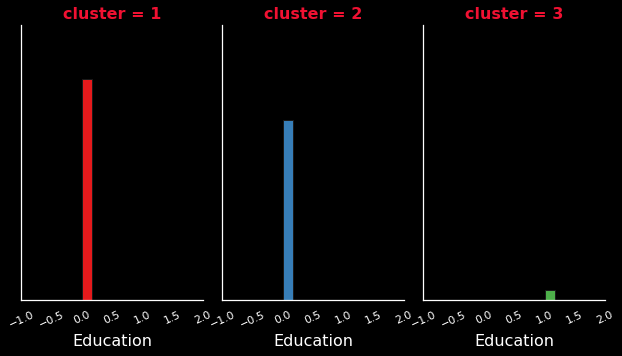

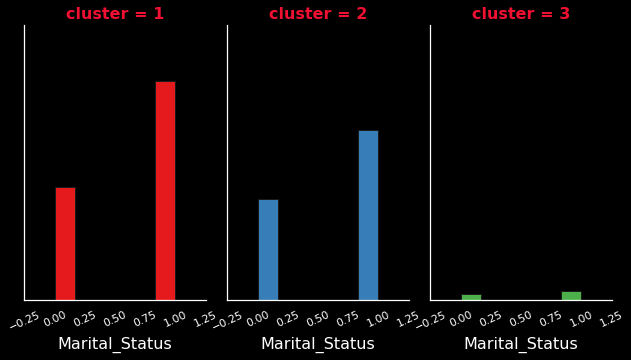

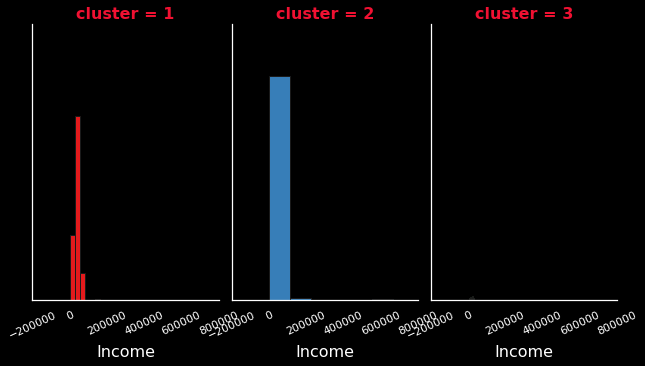

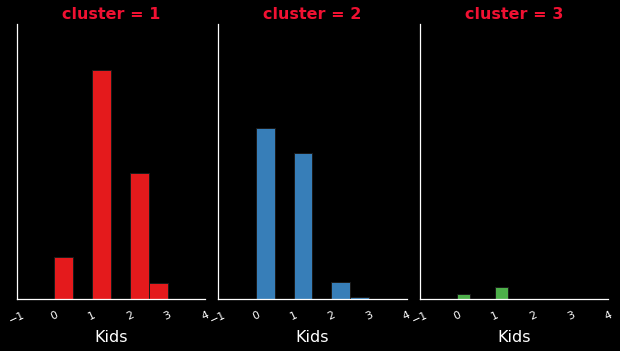

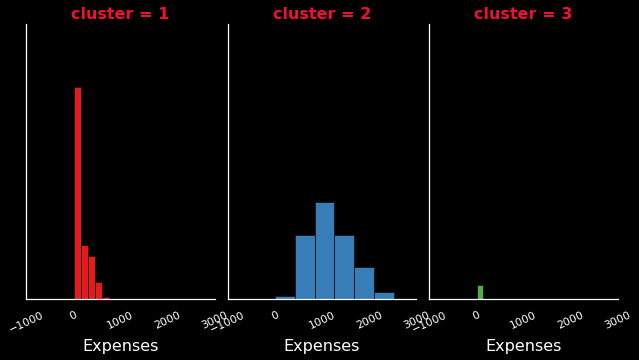

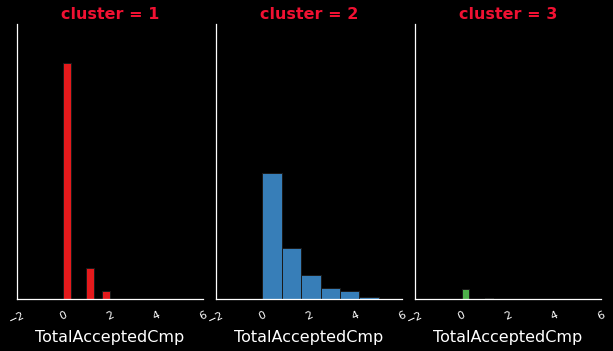

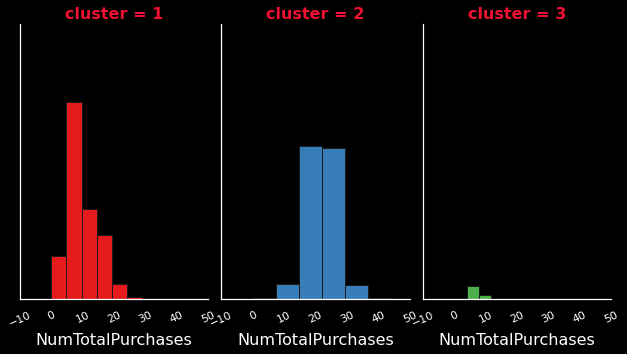

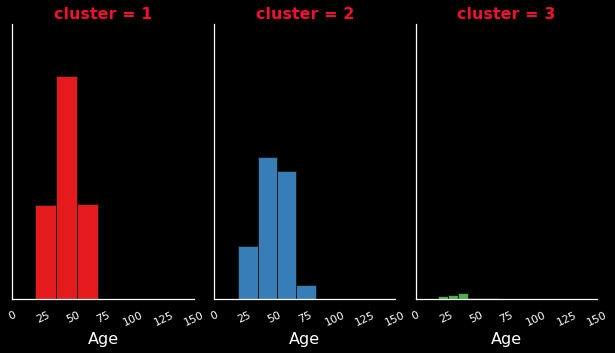

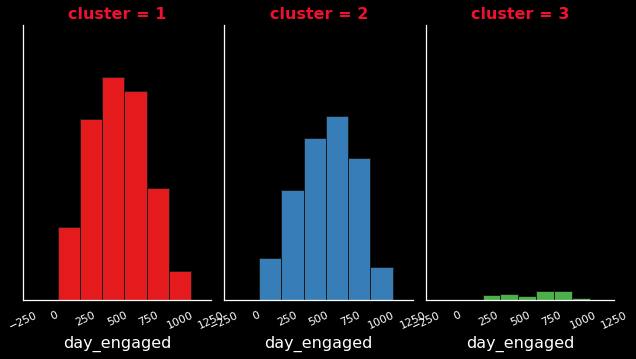

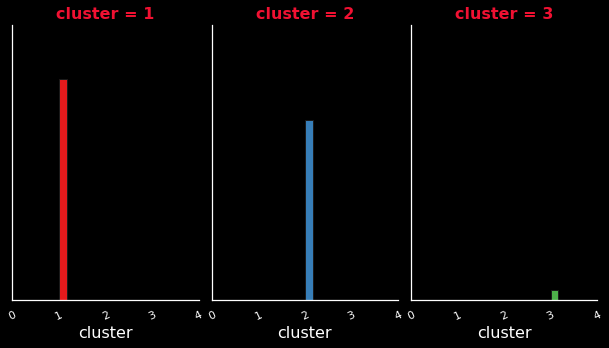

In [56]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

### Report 

#### Based on above information we can divide customers into 3 parts:- 

1. **Highly Active Customer** :- These customers belong to cluster one.
2. **Moderately Active Customer** :- These customers belong to cluster two.
3. **Least Active Customer** :-  These customers belong to cluster three.

#### Characteristics of Highly Active Customer

- **In terms of Education**
 - Highly Active Customer are from PG background


- **In terms of Marital_status**
 - Number of people in relationship are approx. two times of single people


- **In terms of Income**
 - Income of Highly active customer are little less as compare to Moderately active customer.
 
 
- **In terms of Kids**
 - Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).
 
 
- **In terms of Expenses**
 - Expenses of Highly Active customer are less as compare to moderate.
 - These customer spent avg. of approx. 100-200 unit money.


- **In terms of Age**
 - Age of these customer are between 25 to 75.
 - Maximum customer age are between 40 to 50.


- **In terms of day_engaged**
 - Highly Active customer are more loyal as they engaged with company for longer period of time.

#### Characteristics of Moderately Active Customer

- **In terms of Education**
 - Moderately Active Customer are also from PG backgroud


- **In terms of Marital_status**
 - Number of people in relationship are slightly more as compare to single people


- **In terms of Income**
 - Income of Moderately active customer are higher as compare to other customer.


- **In terms of Kids**
 - Moderately active customer have less number of childern as compare to highly active customer ( Max. customer has no child ).


- **In terms of Expenses**
 - Expenses of Moderately Active customer are more as compare to Active.
 - These customer spent avg. of approx. 500-2000 unit money.


- **In terms of Age**
 - Age of these customer are between 25 to 75.
 - Maximum customer age are between 35 to 60.


- **In terms of day_engaged**
 - Moderately Active customer are slightly less engaged with company as compare to Highly Active Customer.
 

#### Characteristics of Least Active Customer

- **In terms of Education**
 - Least Active Customer are from UG backgroud

    
- **In terms of Marital_status**
 - Number of people in relationship are approx. equal to single people

- **In terms of Income**
 - Income of Least active customer are very less or say negligible.
    
- **In terms of Kids**
 - Only few of these customer have child.

- **In terms of Expenses**
 - Expenses of Least Active customer are very less or say negligible.


- **In terms of Age**
 - Age of these customer are between 15 to 30.


- **In terms of day_engaged**
 - Least Active customer are not much enrolled with company for longer time.